# 4.9 Intro to Data Visualization with Python_C

## Part 2

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [7]:
# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [9]:
# Importing project data

path = r'C:\Users\IVON6\Instacart Basket Analysis'
merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [11]:
# Checking dataset after import

merged_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,last_name,gender,state,age,date_joined,num_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## Create a histogram of the “order_hour_of_day” column.

In [14]:
# Exploring the variable order_hour_of_day

merged_all['order_hour_of_day'].describe()

count   32404859.00
mean          13.43
std            4.25
min            0.00
25%           10.00
50%           13.00
75%           16.00
max           23.00
Name: order_hour_of_day, dtype: float64

In [16]:
# Exploring values

merged_all['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

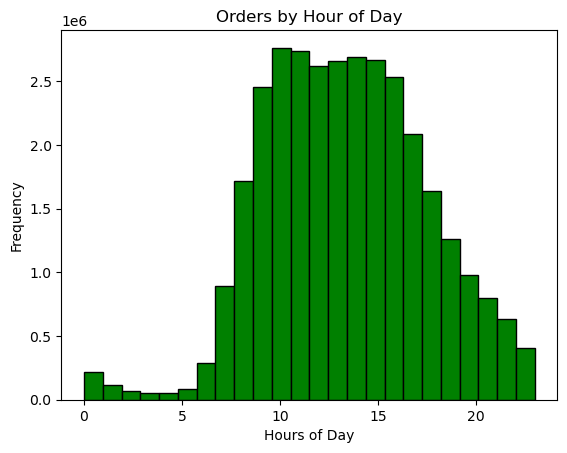

In [33]:
## Creating a histogram

# Data for histogram
data_1 = merged_all['order_hour_of_day']

# Creating a histogram
hist_1 = data_1.plot.hist(bins = 24, color='Green', edgecolor='black')

# Adding title and labels to the histogramm

plt.title("Orders by Hour of Day")
plt.xlabel("Hours of Day")
plt.ylabel("Frequency")
                        
# Show the histogram
plt.show()

In [35]:
# The largest number of orders is made between 9 a.m. and 4 p.m.
# After 5:00 pm orders start to gradually reduce.
# At night, from 12:00 a.m. to 6 a.m., the number of orders is low.

In [49]:
# Exporting the Histogram
hist_1.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'histogram_ordersbyhours.png'))

## Create a bar chart from the “loyalty_flag” column.

In [52]:
# Exploring the variable order_hour_of_day

merged_all['loyalty_flag'].describe()

count             32404859
unique                   3
top       Regular customer
freq              15876776
Name: loyalty_flag, dtype: object

In [53]:
# Exploring counts

merged_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

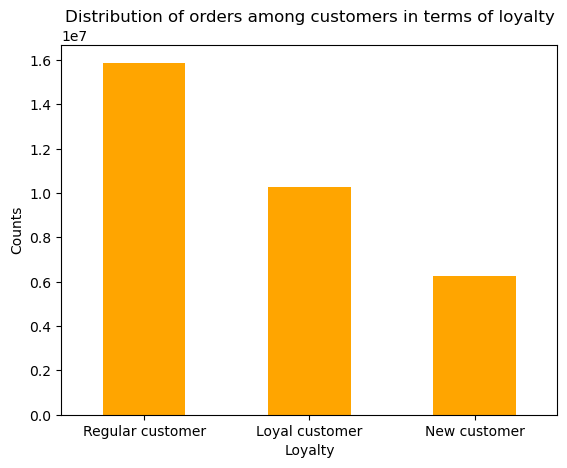

In [84]:
# Creating a bar chart

bar = merged_all['loyalty_flag'].value_counts().plot.bar(color=['Orange'])

# Adding title and labels to the plot
bar.set_title("Distribution of orders among customers in terms of loyalty")
bar.set_xlabel("Loyalty")
bar.set_ylabel("Counts")

# Change the roration on x-axes
plt.xticks(rotation=0)

# Showing the bar chart
plt.show()

In [86]:
# Exporting the chart
bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'bar_loyal_Customers.png'))

## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [89]:
# Exploring the varibale 'prices'

merged_all['prices'].describe()

count   32399732.00
mean           7.79
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

In [91]:
# Turning the unexpected price values to NaN

merged_all.loc[merged_all['prices'] >100, 'prices'] = np.nan

In [93]:
# Creating a random seeed

np.random.seed(4)

# Creating a dev list based on the data split we want (70/30)

dev = np.random.rand(len(merged_all)) <= 0.7

In [95]:
# Split the dataframe into two samples

big = merged_all[dev] # store 70% of the sample in the dataframe big

small = merged_all[~dev] # store 30% of the sample in the dataframe small

In [96]:
# Compare the dataframe length to the sum of the big and small samples

len(merged_all)

32404859

In [97]:
len(big) + len(small)

32404859

In [98]:
# Reducing the number of columns to the number that is necessary

dataframe_2 = small[['order_hour_of_day','prices']]

In [99]:
# Check if the subset of the sample was made properly

dataframe_2.head(5)

,order_hour_of_day,prices
0,11,5.80
2,21,5.80
3,13,5.80
6,14,5.80
10,11,5.80


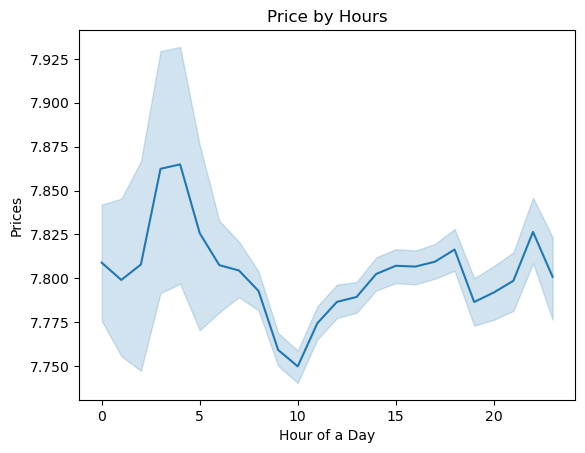

In [100]:
# Creating a line chart 

line_hour_price = sns.lineplot(data = dataframe_2, x = 'order_hour_of_day',y = 'prices')

# Adding title and labels to the line chart

plt.title("Price by Hours")
plt.xlabel("Hour of a Day")
plt.ylabel("Prices")

# Show the line chart
plt.show()

In [107]:
# Price volume distribution appear to be steady and do not change much during the day. It fluctuates between 7.750 and 7.850.

In [109]:
line_hour_price.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'line_hour_price.png'))

## Exploratory analysis of customer demographics.

In [142]:
# Looking at the dataset

merged_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag,last_name,gender,state,age,date_joined,num_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [144]:
# Create a sample dataframe for demographic analysis
df_sample = small[['user_id','prices','price_range_loc','loyalty_flag','spenders','gender','state','age','num_dependants','marital_status','income']]

# Check the output
df_sample.head()

,user_id,prices,price_range_loc,loyalty_flag,spenders,gender,state,age,num_dependants,marital_status,income
0,138,5.80,Mid-range product,Regular customer,Low spender,Male,Minnesota,81,1,married,49620
2,709,5.80,Mid-range product,New customer,Low spender,Female,Vermont,66,2,married,158302
3,764,5.80,Mid-range product,New customer,Low spender,Female,Wisconsin,40,3,married,31308
6,825,5.80,Mid-range product,New customer,Low spender,Male,District of Columbia,20,3,living with parents and siblings,34171
10,1379,5.80,Mid-range product,New customer,Low spender,Male,Alaska,61,1,married,42573


In [146]:
# reduce datset to the columns number of dependents and age groups

df_sample[['age','num_dependants']].describe()

,age,num_dependants
count,9721098.00,9721098.00
mean,49.47,1.50
std,18.49,1.12
min,18.00,0.00
25%,33.00,0.00
50%,49.00,2.00
75%,65.00,3.00
max,81.00,3.00


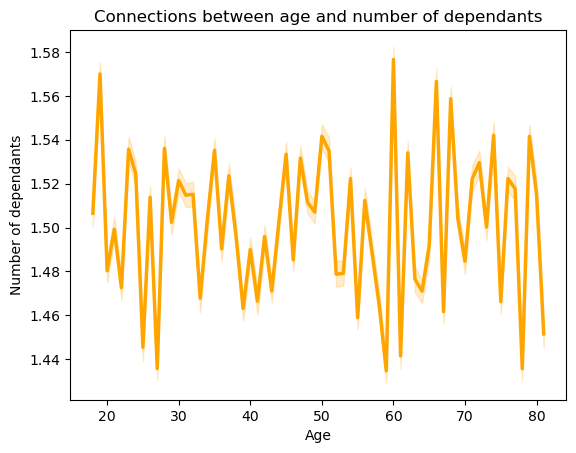

In [148]:
# Creating a line chart 

line_age_depend = sns.lineplot(data = df_sample, x = 'age',y = 'num_dependants', color='Orange', linewidth=2.5)

# Adding title and labels to the line chart

plt.title("Connections between age and number of dependants")
plt.xlabel("Age")
plt.ylabel("Number of dependants")

# Show the line chart
plt.show()

In [152]:
# Calculating correlation between variables number of dependents and age

corr_age_num_dep = df_sample['age'].corr(df_sample['num_dependants'])
print("Correlation between age and number of dependents:", corr_age_num_dep)

Correlation between age and number of dependents: -0.000604893751775168


In [154]:
# No correlation between variables number of dependents and age groups.
# There is no relationship between number of dependents and age.

In [156]:
# Exporting line chart

line_age_depend.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'line_age_num_depend.png'))

## Connection between age and spending power (income).

In [164]:
# Check the ouliers where the price is above 100$
df_sample.loc[df_sample['prices'] > 100]

# Unexpected values to NaN
df_sample.loc[df_sample['prices'] >100, 'prices'] = np.nan

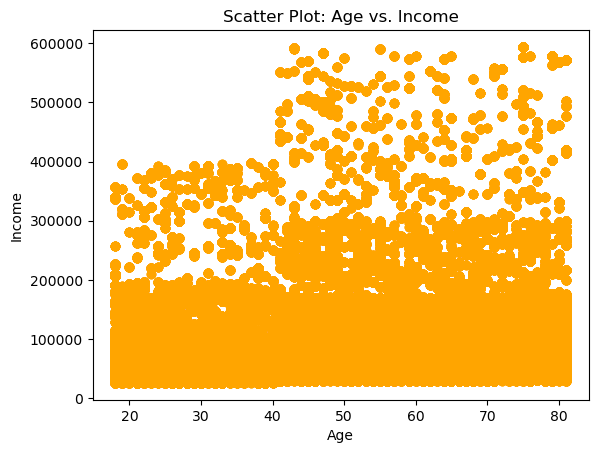

In [166]:
# Creating a scatterplot without outliers

scatter_age_income = plt.scatter(df_sample['age'], df_sample['income'], color= 'Orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot: Age vs. Income')
plt.show()

# Show the histogram
plt.show()

In [168]:
# Based on the scatter plot, an income increase present after the age of 40+ has been identified.

In [170]:
# Exporting scatterplot

scatter_age_income.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'scatterplot_age_income.png'))